In [1]:
from aiida.orm import QueryBuilder, Group, Node
import aiida

aiida.load_profile('quicksetup')

Profile<uuid='152ba6b1f4ad4726905c46d707406b30' name='quicksetup'>

In [2]:
# group_name1 = 'li_s_rc_qcut_20x20'
l = 's'
group_name1 = 'li_s_rc_qcut_20x20_0511'
group_name2 = 'li_s_rc_qcut-partial-zoom-in'

qb = QueryBuilder()
qb.append(Group, filters={'label': {
    'or': [
        {'==': group_name1}, 
        # {'==': group_name2},
    ]
    }}, tag='group')
qb.append(Node, with_group='group', tag='calc')
qb.append(Node, with_outgoing='calc', edge_filters={'label': 'angular_momentum_settings'}, project=[f'attributes.{l}.rc', f'attributes.{l}.qcut'])
qb.append(Node, with_incoming='calc', edge_filters={'label': 'output_parameters'}, project=['attributes'])
results = list(qb.all())

Text(0.5, 1.0, 'Li-s: logder int < 5Ha AE w.r.t PSP')

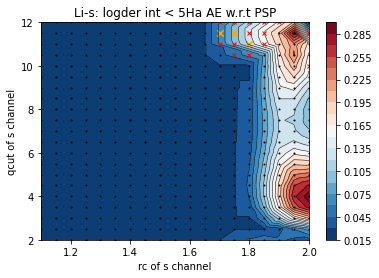

In [10]:
import numpy as np
import matplotlib.pyplot as plt

lst_x = []
lst_y = []
lst_z = []
lst_bad_x = []
lst_bad_y = []
lst_failed_x = []
lst_failed_y = []
for r in results:
    
    d = r[2]
    g_factor = 1000.0
    
    try:
        logder_err = d['crop_0_5_atan_logder_l1err']
        max_ecut = d['max_ecut']
        ev = (d['tc_0']['state_error_avg'] * g_factor + d['tc_1']['state_error_avg'] + d['tc_2']['state_error_avg']) / 3
        # print(d['tc_1']['state_error_avg'])
        z_res = (logder_err, max_ecut, max_ecut * logder_err, ev)
        z_res = logder_err
    except KeyError:
        lst_failed_x.append(r[0])
        lst_failed_y.append(r[1])
        continue
        
    if z_res < 1.0:
        lst_x.append(r[0])
        lst_y.append(r[1])
        lst_z.append(z_res)
    else:
        lst_bad_x.append(r[0])
        lst_bad_y.append(r[1])
    
x = np.array(lst_x)
y = np.array(lst_y)
z = np.abs(np.array(lst_z))

fig, ax = plt.subplots()
ax.tricontour(x, y, z, levels=20, linewidths=0.5, colors='k')
cntr2 = ax.tricontourf(x, y, z, levels=20, cmap="RdBu_r")
fig.colorbar(cntr2, ax=ax)
ax.plot(x, y, 'ko', ms=1)

# plot faied and bad
ax.plot(lst_failed_x, lst_failed_y, 'rx', ms=4)
ax.scatter(lst_bad_x, lst_bad_y, color='orange', marker='x', s=40)

ax.set_xlabel(f'rc of {l} channel')
ax.set_ylabel(f'qcut of {l} channel')

# ax.set(xlim=(1.1, 1.6), ylim=(7.0, 9))
ax.set_title(f'Li-{l}: logder int < 5Ha AE w.r.t PSP')

Text(0.5, 1.0, 'Li-s: max ecut')

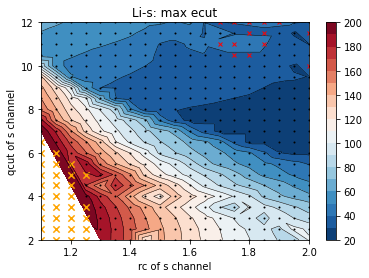

In [13]:
import numpy as np
import matplotlib.pyplot as plt

lst_x = []
lst_y = []
lst_z = []
lst_bad_x = []
lst_bad_y = []
lst_failed_x = []
lst_failed_y = []
for r in results:
    
    d = r[2]
    g_factor = 1000.0
    
    try:
        logder_err = d['crop_0_5_atan_logder_l1err']
        max_ecut = d['max_ecut']
        ev = (d['tc_0']['state_error_avg'] * g_factor + d['tc_1']['state_error_avg'] + d['tc_2']['state_error_avg']) / 3
        # print(d['tc_1']['state_error_avg'])
        z_res = (logder_err, max_ecut, max_ecut * logder_err, ev)
        z_res = max_ecut
    except KeyError:
        lst_failed_x.append(r[0])
        lst_failed_y.append(r[1])
        continue
        
    if z_res < 200:
        lst_x.append(r[0])
        lst_y.append(r[1])
        lst_z.append(z_res)
    else:
        lst_bad_x.append(r[0])
        lst_bad_y.append(r[1])
    
x = np.array(lst_x)
y = np.array(lst_y)
z = np.abs(np.array(lst_z))

fig, ax = plt.subplots()
ax.tricontour(x, y, z, levels=20, linewidths=0.5, colors='k')
cntr2 = ax.tricontourf(x, y, z, levels=20, cmap="RdBu_r")
fig.colorbar(cntr2, ax=ax)
ax.plot(x, y, 'ko', ms=1)

# plot faied and bad
ax.plot(lst_failed_x, lst_failed_y, 'rx', ms=4)
ax.scatter(lst_bad_x, lst_bad_y, color='orange', marker='x', s=40)

ax.set_xlabel(f'rc of {l} channel')
ax.set_ylabel(f'qcut of {l} channel')

# ax.set(xlim=(1.1, 1.6), ylim=(7.0, 9))
ax.set_title('Li-s: max ecut')

Text(0.5, 1.0, 'Li-s: max ecut * loger int')

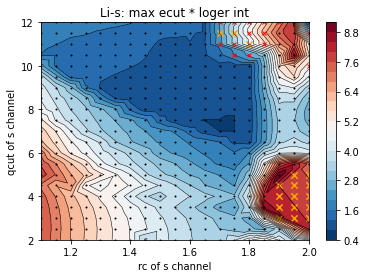

In [12]:
import numpy as np
import matplotlib.pyplot as plt

lst_x = []
lst_y = []
lst_z = []
lst_bad_x = []
lst_bad_y = []
lst_failed_x = []
lst_failed_y = []
for r in results:
    
    d = r[2]
    g_factor = 1000.0
    
    try:
        logder_err = d['crop_0_5_atan_logder_l1err']
        max_ecut = d['max_ecut']
        ev = (d['tc_0']['state_error_avg'] * g_factor + d['tc_1']['state_error_avg'] + d['tc_2']['state_error_avg']) / 3
        # print(d['tc_1']['state_error_avg'])
        z_res = (logder_err, max_ecut, max_ecut * logder_err, ev)
        z_res = max_ecut * logder_err
    except KeyError:
        lst_failed_x.append(r[0])
        lst_failed_y.append(r[1])
        continue
        
    if z_res < 10:
        lst_x.append(r[0])
        lst_y.append(r[1])
        lst_z.append(z_res)
    else:
        lst_bad_x.append(r[0])
        lst_bad_y.append(r[1])
    
x = np.array(lst_x)
y = np.array(lst_y)
z = np.abs(np.array(lst_z))

fig, ax = plt.subplots()
ax.tricontour(x, y, z, levels=20, linewidths=0.5, colors='k')
cntr2 = ax.tricontourf(x, y, z, levels=20, cmap="RdBu_r")
fig.colorbar(cntr2, ax=ax)
ax.plot(x, y, 'ko', ms=1)

# plot faied and bad
ax.plot(lst_failed_x, lst_failed_y, 'rx', ms=4)
ax.scatter(lst_bad_x, lst_bad_y, color='orange', marker='x', s=40)

ax.set_xlabel(f'rc of {l} channel')
ax.set_ylabel(f'qcut of {l} channel')
# ax.set(xlim=(1.1, 1.6), ylim=(7.0, 9))
ax.set_title('Li-s: max ecut * loger int')

Text(0.5, 1.0, 'Li-s: state_errors_avg')

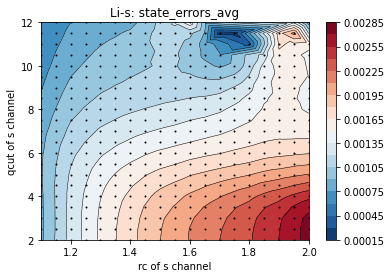

In [8]:
import numpy as np
import matplotlib.pyplot as plt

lst_x = []
lst_y = []
lst_z = []
lst_bad_x = []
lst_bad_y = []
lst_failed_x = []
lst_failed_y = []
for r in results:
    
    d = r[2]
    g_factor = 1000.0
    
    try:
        logder_err = d['crop_0_5_atan_logder_l1err']
        max_ecut = d['max_ecut']
        ev = (d['tc_0']['state_error_avg'] * g_factor + d['tc_1']['state_error_avg'] + d['tc_2']['state_error_avg']) / 3
        # print(d['tc_1']['state_error_avg'])
        z_res = (logder_err, max_ecut, max_ecut * logder_err, ev)
        z_res = ev
    except KeyError:
        lst_failed_x.append(r[0])
        lst_failed_y.append(r[1])
        continue
        
    lst_x.append(r[0])
    lst_y.append(r[1])
    lst_z.append(z_res)
    # else:
    #     lst_bad_x.append(r[0])
    #     lst_bad_y.append(r[1])
    
x = np.array(lst_x)
y = np.array(lst_y)
z = np.abs(np.array(lst_z))

fig, ax = plt.subplots()
ax.tricontour(x, y, z, levels=20, linewidths=0.5, colors='k')
cntr2 = ax.tricontourf(x, y, z, levels=20, cmap="RdBu_r")
fig.colorbar(cntr2, ax=ax)
ax.plot(x, y, 'ko', ms=1)

# plot faied and bad
# ax.plot(lst_failed_x, lst_failed_y, 'rx', ms=4)
ax.scatter(lst_bad_x, lst_bad_y, color='orange', marker='x', s=40)

ax.set_xlabel(f'rc of {l} channel')
ax.set_ylabel(f'qcut of {l} channel')
# ax.set(xlim=(1.1, 1.6), ylim=(7.0, 9))
ax.set_title('Li-s: state_errors_avg')

In [ ]:
minidx = np.argmin(z)
print(f'min at {minidx}: x={x[minidx]}, y={y[minidx]} where error={z[minidx]}')

In [ ]:
# Show diff of result output between found min and ref